<a href="https://colab.research.google.com/github/twikenqc/quentin-nsi/blob/master/Copie_de_LSC_NSI_SD4_Graphes_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Nous avons vu ce matin des situations dont la résolution pouvait se faire en modélisant le problème sous forme de graphes. Nous revenons ici sur la notion de graphe afin de :

- fixer le vocabulaire
- manipuler une bibliothèque de gestion de graphes : [networkX](https://networkx.github.io/) - [`networkx.github.io/`](https://networkx.github.io/)

# Partie I : vocabulaire, introduction à NetworkX

## Graphes non orientés

Voici un graphe :

![](fig/graphe_non_oriente.png)

Ce graphe est constitué de :
- 4 _sommets_ (étiquetés 1, 2, 3, 4)
- 5 _arêtes_ qui relient des couples de sommets

Deux sommets reliés par une arête sont _adjacents_.

Remarquez qu'un sommet peut ne être relié à aucun autre par une arête.

Nous allons construire ce graphe avec la bibliothèque NetworkX :

- on importe le module,
- on crée un graphe vide,
- on ajoute les sommets (appelés *node*),
- et enfin les arêtes (appelées *edge*).

(nous verrons plus loin d'autres façons de construire des graphes avec NetworkX)

In [ ]:
import networkx as nx

In [ ]:
g1 = nx.Graph()

In [ ]:
g1.add_node(1)
g1.add_node(2)
g1.add_node(3)
g1.add_node(4)

In [ ]:
g1.add_edge(1,2)
g1.add_edge(1,3)
g1.add_edge(1,4)
g1.add_edge(2,3)
g1.add_edge(2,4)
g1.add_edge(2,4)

On peut visualiser le graphe grâce à `matplotlib`et la fonction `draw`. Ici on a de plus configuré l'affichage pour que les étiquettes des sommets soient affichées, la taille des sommets soit de 800, la couleur de fond des sommets gris clair. Si on effectue l'affichage en dehors d'un notebook, il ne faut pas oublier l'instruction `plt.show()`.

In [ ]:
import matplotlib.pyplot as plt

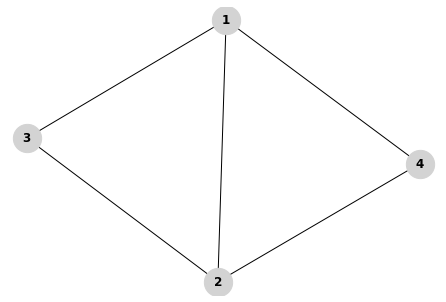

In [ ]:
nx.draw(g1, with_labels=True, font_weight='bold', node_size=800, node_color='lightgrey')

Le _degré_ d'un sommet est le nombre d'extrêmités d'arêtes qui
touchent ce sommet (on parle d'arêtes _incidentes_).

Les _voisins_ d'un sommet $x$ sont les sommets $y$ tels qu'il existe une arête entre $x$ et $y$.

La documentation de NetworkX est divisée en sections. Il existe notamment :

- une section pour obtenir les méthodes [sur les sommets et les arêtes](https://networkx.github.io/documentation/stable/reference/functions.html),
- une section pour obtenir les [algorithmes disponibles](https://networkx.github.io/documentation/stable/reference/algorithms/index.html).

On pourra consulter (plus tard) le [tutoriel de NetworkX](https://networkx.github.io/documentation/stable/tutorial.html).

**À faire.** Avec NetworkX, cherchez les méthodes pour obtenir les informations suivantes :

- le nombre de sommets du graphe
- le nombre d'arêtes du graphe
- le degré du sommet 1
- le degré du sommet 2
- les voisins du sommet 1

et expérimentez.

In [ ]:
g1 = nx.Graph()
len(list(g1.nodes))

0

## Graphes orientés

Contrairement au graphe précédent, le graphe :

![](fig/graphe_oriente.png)

comporte des "arêtes avec une flèche" : on parle alors d'_arc_. Le
graphe est dit _orienté_. On distingue le sommet _source_ (on dit
aussi _origine_) de l'arc du sommet _but_ de l'arc.

Remarquez que NetworkX utilise le même vocabulaire pour désigner arcs et arêtes : _edge_. En anglais, pour désigner des arcs, on utilisera le vocabulaire _directed edge_ mais cette distinction est rarement faite car dès que l'on sait qu'on parle de graphe oreinté alors il n'y a pas d'ambiguïté dans le mot _edge_ (bien sûr le sens de lecture a de l'importance, _an edge between a and b_ ne veut pas dire la même chose que _an edge between b and a_. 

Dans NetworkX la distinction se fait à la construction du graphe, où le type est choisi : c'est un objet `DiGraph` (directed graph) au lieu d'un objet `Graph` (voir la documention [sur  les types de graphes](https://networkx.github.io/documentation/stable/reference/classes/index.html)). 

Par exemple pour construire le graphe orienté ci-dessus :

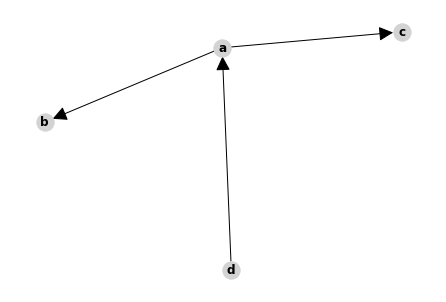

In [ ]:
g2 = nx.DiGraph()
g2.add_node('a')
g2.add_node('b')
g2.add_node('c')
g2.add_node('d')
g2.add_edge('a','b')
g2.add_edge('a','c')
g2.add_edge('d','a')
nx.draw(g2, with_labels=True, font_weight='bold', node_size=300, node_color='lightgrey',arrowsize=30)

Pour savoir si un graphe est orienté ou non, on peut utiliser le prédicat suivant :

In [ ]:
g1.is_directed()

False

In [ ]:
g2.is_directed()

True

Alors qu'on ne parlait que de voisins dans un graphe non orienté, on distinguera ici :
- les _successeurs_ d'un sommet $x$ sont les sommets $y$ tels qu'il existe un arc entre $x$ et $y$,
- les _prédécesseurs_ d'un sommet $x$ sont les sommets $y$ tels qu'il existe un arc entre $y$ et $x$.

**À faire.** Trouver les méthodes de NetworkX permettant d'identifier les successeurs et prédecesseurs d'un sommet. Expérimenter sur les sommets de g2.

In [ ]:
list(g2.neighbors('a'))

['b', 'c']

**À faire.** Que se passe-t-il si on demande les successeurs/prédecesseurs d'un sommet d'un graphe non orienté.

In [ ]:
list(g1.neighbors(1))

NetworkXError: ignored

**Remarque** Sur un graphe orienté, la méthode `neighbors` vue précédemment ne fournit que la liste des successeurs.

In [ ]:
list(g2.neighbors('d'))

['b', 'c']

Si l'on veut tous les voisins il faut utiliser la fonction `all_neighbors`.

In [ ]:
list(nx.all_neighbors(g2,'a'))

['d', 'b', 'c']

On distingue également :
- le _degré entrant_ d'un sommet égal au nombre d'arcs dont le but est ce sommet (i.e. le nombre de prédécesseurs),
- le _degré sortant_ d'un sommet égal au nombre d'arcs dont la source est ce sommet (i.e. le nombre de successeurs),
- le degré d'un sommet est égal à la somme des deux précédents

## Graphes valués (hors NSI)

Comme pour les arbres, on peut associer aux sommets, tout comme aux
arêtes (ou aux arcs) des étiquettes. Souvent l'étiquette associée à un arc ou une arête représente un poids. On peut ainsi modéliser des liens de natures différentes entre les sommets d'un graphe (par exemple j'ai deux routes de longueurs différentes pour rejoindre deux villes).

Cela permet d'avoir des chemins de poids différents entre des sommets quelconques du graphe, le poids d'un chemin étant défini comme la somme des poids des arêtes/arcs empruntés.

# Partie II : constructions et manipulations élémentaires sur les graphes

NetworkX permet de construire des graphes de différents façons. Une première manière de faire est d'ajouter des sommets à un graphe, puis de relier les sommets par des arêtes, comme cela a été fait plus haut.

On obtient les sommets avec la méthode `nodes` invoquée sur un objet de type `Graph`, qui retourne un objet itérable. On peut le transformer en liste pour voir le contenu.

In [ ]:
list(g1.nodes())

[1, 2, 3, 4]

In [ ]:
list(g1.edges())

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]

Une seconde manière est de créer le graphe directement à partir d'une liste d'arêtes, cela crée implicitement les sommets. Si les noms des sommets sont donnés par des chaînes de caractères, cela fonctionne aussi :

In [ ]:
h = nx.Graph([('Paul','Jacques'),('Paul','Maryse')])

 mais les sommets de degré 0 ne peuvent être ajoutés directement, il faut le faire dans une seconde étape :

In [ ]:
h.add_node('Séverine')

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


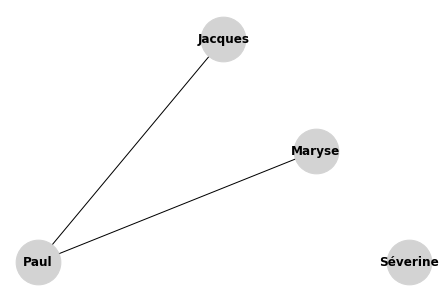

In [ ]:
nx.draw(h, with_labels=True, font_weight='bold', node_size=2000, node_color='lightgrey',arrowsize=20, pos=nx.planar_layout(h))

Remarquez qu'ici on a demandé de dessiner les graphes en utilisant un agencement (_layout_) des sommets précalculé (voir la [documentation](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)). Différents agencements sont disponibles. Certains algorithmes de calcul d'agencements introduisent de l'aléatoire qui font qu'on peut ne pas avoir toujours le même agencement en exécutant la même instruction deux fois de suite (le calcul d'agencement n'est pas déterministe).

De plus certains agencements sont impossibles à réaliser pour certains graphes. Ici nous avons demandé un agencement planaire, qui calcule un agencement sans croisement, ce qui n'est pas toujours possible. D'ailleurs la fonction `check_planarity` permet d'obtenir cette information.

**À faire.** Créer le graphe suivant (qu'on nommera `g3`) :

![](fig/graphe_g3.png)

Puis le visualiser.

In [ ]:
import networkx as nx
g=nx.graph([('a','b'),('b','c'),('b','g'),('b','d'),('g','d'),('d','c')])
nx.draw(g, with_labels=True, font_weight='bold', node_size=2000, node_color='lightgrey',arrowsize=20, pos=nx.planar_layout(g))

TypeError: ignored

**À faire.** Vérifier grâce aux fonctions NetworkX que le graphe est bien celui attendu (i.e. tous les sommets et toutes les arêtes sont présentes).

**À faire.** Écrire une fonction qui, pour un graphe donné en paramètre, permette d'obtenir la liste des sommets ayant le degré maximal. L'appliquer sur le graphe `g3`.

**À faire.** Créer le graphe (qu'on nommera `amis`) permettant de représenter les relations d'amitiés (asymétriques) suivantes : Henri, Jacqueline, Roger sont amis avec Marcel, Jaqueline et Roger sont amis réciproques, Marcel est ami avec Bernadette et Jean, Bernadette est amie avec Henri et Anatole, Anatole est ami réciproque avec Marcel. Puis le dessiner (le graphe construit ici est planaire).


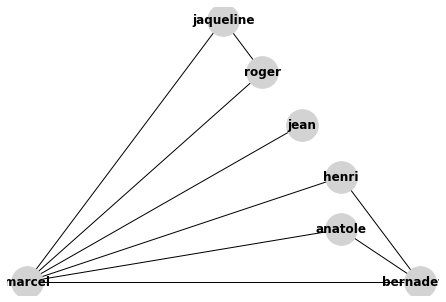

In [ ]:
a= nx.Graph([('marcel','henri'),('marcel','jaqueline'),('roger','marcel'),('jaqueline','roger'),('marcel','bernadetta'),('marcel','jean'),('bernadetta','henri'),('bernadetta','anatole'),('marcel','anatole')])
nx.draw(a, with_labels=True, font_weight='bold', node_size=1000, node_color='lightgrey',arrowsize=20, pos=nx.planar_layout(a))

**À faire.** Qui a le plus d'amis ?

In [ ]:
Marcel

**À faire.** Qui est ami avec le plus de monde ?

In [ ]:
marcel

# Partie III : parcours dans les graphes

Lorsqu'on dispose d'un graphe, les opérations les plus courantes consistent à rechercher si deux sommets peuvent être reliés (par exemple si le graphe modélise des parcours possibles entre villes), le parcourir (par exemple si le graphe représente des solutions d'un jeu), chercher un cycle (par exemple pour réaliser une tournée), déterminer les composantes connexes (par exemple si le graphe modélise des relations d'amitiés).

## Graphes non orientés 

Lorsqu'on passe de sommet en sommet en suivant les arêtes on construit
une _chaîne_. Une chaîne peut emprunter plusieurs fois par le même
sommet et/ou la même arête. La _longueur_ de la chaîne est le nombre de sommets empruntés.

Une chaîne est :
- _simple_ si elle n'emprunte pas deux fois la même arête,
- _élémentaire_ si elle n'emprunte pas deux fois le même sommet,
- un _cycle_ si le dernier et le dernier sommet de la chaîne sont identiques.

Si il existe une chaîne reliant deux sommets $x$ et $y$ alors on dit que $x$ et $y$ sont reliés par une chaîne. Cela permet de définir les _composantes connexes d'un graphe_ qui sont les sous-graphes engendrés par les chaînes.

Par exemple, dans le graphe `g3` :

In [ ]:
import networkx as nx
list(nx.connected_components(g3))

NameError: ignored

## Graphes orientés

On retrouve les mêmes définitions que pour les graphes orientés sauf que :
- une chaîne s'appelle un _chemin_,
- un cycle s'appelle un _circuit_.

On ne peut pas parler de composante connexe dans un graphe orienté à cause de la relation non symétrique entre les sommets. On parle de _composante fortement connexe_ pour désigner les ensembles de sommets tel que pour tout couple de sommets il existe un chemin.

Par exemple sur le graphe `amis` :

In [ ]:
list(nx.strongly_connected_components(a))

NameError: ignored

## Parcours en profondeur

Le parcours en largeur consiste à explorer les sommets du graphe, en
passant de sommet en sommet en suivant l'un des successeurs et en marquant
les sommets visités afin de ne pas les visiter à nouveaux. Lorsqu'il
n'y a plus de sommets accessibles non encore visités, on revient au
sommet précédent.

C'est donc un procédure récursive dont l'implantation peut être
réalisée à l'aide d'une pile.

Dépendamment de l'ordre dans lequel on empile les successeurs, il peut
y avoir plusieurs ordres pour lister les sommets lors du parcours en profondeur.

C'est typiquement le parcours que l'on fait lorsqu'on explore un labyrinthe.

## Parcours en largeur

Le parcours en largeur consiste à explorer les sommets du graphe, en
explorant d'abord tous les successeurs d'un sommet avant d'explorer les successeurs des successeurs.

Cette fois, c'est une file qui nous aidera à stocker les sommets à visiter avant de poursuivre.

Dépendamment de l'ordre dans lequel on enfile les successeurs, il peut
y avoir plusieurs ordres pour lister les sommets lors du parcours en largeur.

## Calcul des chaînes/chemins élémentaires

**À faire.** Calculer à la main toutes les chaînes élémentaires entre 'a' et 'c' du graphe `g3`.

**À faire.** Avec NetworkX, cela peut être calculé avec la fonction [all_simple_paths](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.simple_paths.all_simple_paths.html). Vérfier que le calcul fait à la main est correct.

**À faire.** Vérifier dans la documentation de la fonction `all_simple_paths` quel parcours a réalisé l'algorithme de calcul des chaînes élémentaires ?

**À faire.** Écrire sa propre implantation du calcul de toutes les chaînes élémentaires d'un graphe non orienté entre deux sommets donnés dans une fonction `liste_chemins`. Appliquer sur `g3`.

In [ ]:
def liste_chemins (G,source,but):
    pass

## Recherche de cycles/circuits

**À faire.** NetworkX fournit deux fonctions permettant de calculer des cycles : `simple_cyles` et `find_cycle`. Expérimentez sur le graphe `amis`.

**À faire.** Quelles différences y a-t-il entre ce que calculent ces deux fonctions ? En particulier quelle raison peut faire que `find_cycle` ne trouve pas le cycle Anatole, Marcel, Bernadette ?

# Partie IV : représentation des graphes

Différentes représentations des graphes sont possibles. Nous allons traiter des représentations 
- par matrice d'adjacence,
- par liste de successeurs et de prédecesseurs.

## Représentation par matrice d'adjacence

La matrice d'adjacence est un tableau, de dimension $n \times n$ si le graphe contient $n$ sommets, indicé par les sommets. On indique à la case d'intersection de la colonne $x$ et de la ligne $y$ le nombre d'arêtes entre les sommets $x$ et $y$ (on remarquera que ce nombre peut être plus grand que 1 si il y a deux arêtes qui rejoignent les mêmes sommets). Dans le cas d'un graphe non orienté, cette matrice est symétrique.

Le graphe `g3`sera représenté par :

|   | a | b | c | d | g |
|---|---|---|---|---|---|
| a | 0 | 1 | 0 | 0 | 0 |
| b | 1 | 0 | 1 | 1 | 1 |
| c | 0 | 1 | 1 | 1 | 0 |
| d | 0 | 1 | 1 | 0 | 1 |
| g | 0 | 1 | 0 | 1 | 0 |

Dans le cas d'un graphe orienté la case $x,y$ indiquera le nombre d'arcs allant de $x$ à $y$ tandis que la case $y,x$ indiquera le nombre d'arcs allant de $y$ à $x$. La matrice n'est donc pas nécessairement symétrique.

Il est possible grâce à NetworkX de créer des graphes à partir de matrices d'adjacence. Pour cela il faut donner en entrée une matrice numpy.

On aurait pu aussi créer un graphe orienté.

import numpy as np

cree une matrice numpy a partir d'une liste de listes
m = np.matrix([[0,1,0,0,0],[1,0,1,1,1],[0,1,1,1,0],[0,1,1,0,1],[0,1,0,1,0]]) g3bis = nx.from_numpy_matrix(m)

nx.dg3bis = nx.relabel_nodes(g3bis,{0:'a', 1:'b', 2:'c', 3: 'd', 4:'g'})raw(g3bis, with_labels=True, font_weight='bold',node_size=800, node_color='lightgrey',arrowsize=20, pos=nx.planar_layout(g3bis))

In [ ]:
import numpy as np

cree une matrice numpy a partir d'une liste de listes
m = np.matrix([[0,1,0,0,0],[1,0,1,1,1],[0,1,1,1,0],[0,1,1,0,1],[0,1,0,1,0]]) g3bis = nx.from_numpy_matrix(m)

nx.dg3bis = nx.relabel_nodes(g3bis,{0:'a', 1:'b', 2:'c', 3: 'd', 4:'g'})raw(g3bis, with_labels=True, font_weight='bold',node_size=800, node_color='lightgrey',arrowsize=20, pos=nx.planar_layout(g3bis))import numpy as np

cree une matrice numpy a partir d'une liste de listes
m = np.matrix([[0,1,0,0,0],[1,0,1,1,1],[0,1,1,1,0],[0,1,1,0,1],[0,1,0,1,0]]) g3bis = nx.from_numpy_matrix(m)

nx.dg3bis = nx.relabel_nodes(g3bis,{0:'a', 1:'b', 2:'c', 3: 'd', 4:'g'})raw(g3bis, with_labels=True, font_weight='bold',node_size=800, node_color='lightgrey',arrowsize=20, pos=nx.planar_layout(g3bis))

SyntaxError: ignored

In [ ]:
nx.dg3bis = nx.relabel_nodes(g3bis,{0:'a', 1:'b', 2:'c', 3: 'd', 4:'g'})raw(g3bis, with_labels=True, font_weight='bold',node_size=800, node_color='lightgrey',arrowsize=20, pos=nx.planar_layout(g3bis))

**À faire.** Quelle est la représentation sous forme de matrice d'adjacence du graphe `amis` ?

In [ ]:
import numpy as np
# cree une matrice numpy a partir d'une liste de listes
m = np.matrix([[0,1,0,0,0],[1,0,1,1,1],[0,1,1,1,0],[0,1,1,0,1],[0,1,0,1,0]])
Abis = nx.from_numpy_matrix(m)

**À faire.** Créer à nouveau le graphe `amis` mais à partir d'une matrice d'adjacences.

## Représentation par liste de successeurs et de prédecesseurs

Dans le cas d'un graphe non orienté, la liste des voisins est suffisante.

Le graphes `g3` sera représenté de la manière suivante :

- à 'a' on associe la liste : 'b'
- à 'b' on associe la liste : 'a', 'c', 'd', 'g'
- à 'c' on associe la liste : 'c', 'b', 'd'
- à 'd' on associe la liste : 'c', 'b', 'g'
- à 'g' on associe la liste : 'b', 'd'

Dans le cas d'un graphe orienté on aura besoin de la liste des successeurs ou des prédécesseurs.

NetworkX permet d'obtenir cette représentation sous la forme d'un dictionnaire Python.

In [ ]:
nx.to_dict_of_lists(g3)

NameError: ignored

**À faire.** Quelle est la représentation sous forme de liste de successeurs du graphe `amis` ?

**À faire.** Recréer le graphe `amis` grâce à la fonction `from_dict_of_list` de NetworkX qui prend en entrée un dictionnaire comme celui ci-dessus donnant les successeurs.

# Partie V : applications

## Réseau social

On imagine disposer d'un graphe semblable au graphe `amis` utilisé avant indiquant des relations d'amitiés (asymétriques) dans un réseau social (typiquement Twitter).

On se propose de trouver un moyen de répondre aux deux questions suivantes :

1. calculer tous les amis des amis d'un membre quelconque du réseau
    - formuler le problème sous forme d'un problème dans un graphe
    - écrire le code Python permettant de répondre à la question (en utilisant NetworkX)
1. calculer les cercles d'amis, c'est-à-dire les groupes de personnes qui sont amis entre-elles 
    - formuler le problème sous forme d'un problème dans un graphe
    - écrire le code Python permettant de répondre à la question (en utilisant NetworkX)

## Cartes

On revient ici sur [l'exemple du voyageur de commerce](https://gitlab-fil.univ-lille.fr/diu-eil-lil/portail/blob/master/bloc2/tsp/Readme.md)  qui avait été traité au printemps dernier
dans le bloc2 lors de la discussion sur les algorithmes gloutons. Pour rappel il s'agissait de trouver une tournée la plus courte entre différentes villes en France.

De manière sous-jacente, la recherche de la tournée la plus courte revient à rechercher un cycle dans un graphe où les sommets sont les villes. Dans cet exemple, il y avait une route entre chaque couple de villes.

Si on reprend les données :    

In [ ]:
liste_des_villes = [['Annecy', 6.082499981, 45.8782196], ['Auxerre', 3.537309885, 47.76720047], ['Bastia', 9.434300423, 42.66175842], ['Bordeaux', -0.643329978, 44.80820084], ['Boulogne', 1.579570055, 50.70875168], ['Brest', -4.552110195, 48.36014938], ['Caen', -0.418989986, 49.14748001], ['Grenoble', 5.684440136, 45.13940048], ['Le Havre', 0.037500001, 49.45898819], ['Lens', 2.786649942, 50.40549088], ['Lille', 2.957109928, 50.57350159], ['Lyon', 4.768929958, 45.70447922], ['Paris', 2.086790085, 48.65829086], ['Lyon', 4.768929958, 45.70447922], ['Marseille', 5.290060043, 43.1927681], ['Metz', 6.11729002, 49.0734787], ['Nantes', -1.650889993, 47.16867065], ['Nancy', 6.134119987, 48.66695023], ['Nice', 7.19904995, 43.6578598], ['Rennes', -1.759150028, 48.05683136], ['Strasbourg', 7.687339783, 48.49562836], ['Saint-Etienne', 4.355700016, 45.39992905], ['Sedan', 4.896070004, 49.68407059], ['Toulouse', 1.356109977, 43.5388298]]

matrice_distance = np.matrix([[   0.        ,  342.06521589,  505.26880816,  195.91738327,
         571.22994001, 1213.46095318,  760.81558275,   82.12092905,
         698.84015349,  538.57470424,  544.82697629,   39.48967066,
         537.11380375,   39.48967066,  307.66916206,  355.07573536,
         723.37834596,  309.93566554,  261.84998812,  894.12998434,
         340.97945879,   55.64343688,  435.59490231,  470.9291439 ],
       [ 342.06521589,    0.        ,  607.64134221,  452.85138969,
         345.67065405,  534.39173537,  184.95659496,  346.70626305,
         190.64471485,  294.89087001,  313.23065597,  261.88811145,
         124.03947834,  261.88811145,  508.50996942,  164.62689923,
         546.78779058,  166.09897218,  461.17669088,  416.27166437,
         259.19691   ,  274.36745728,  213.05384296,  470.47822801],
       [ 505.26880816,  607.64134221,    0.        , 1111.64185359,
        1193.29859417,  636.58110398,  813.34684152,  498.26475461,
         909.83714109, 1056.90810605, 1081.26512838,  610.2276268 ,
         672.00817298,  610.2276268 ,  234.66138648,  721.53746266,
         888.17802791,  668.5379917 ,  202.01990047,  645.5866113 ,
         648.27867126,  640.54701568,  833.4923966 ,  578.814938  ],
       [ 195.91738327,  452.85138969, 1111.64185359,    0.        ,
         685.17981421,  542.78535782,  482.81104513,  386.67790066,
         522.30311255,  707.66213428,  724.09573394,  202.10574527,
         511.58675279,  202.10574527,  683.21268132,  877.66598556,
         266.51119969,  818.84938946,  853.81852379,  373.41122124,
         920.70114652,  249.93801147,  816.58291793,  259.76092146],
       [ 571.22994001,  345.67065405, 1193.29859417,  685.17981421,
           0.        ,  570.45477228,  272.0554744 ,  695.66364473,
         218.38159471,  132.81311953,  143.18962673,  580.37681784,
         232.66129696,  580.37681784,  928.6945204 ,  503.25842863,
         402.82147412,  480.87939751, 1001.20465157,  377.29307774,
         588.62492472,  618.03858451,  384.87886229,  797.10856902],
       [1213.46095318,  534.39173537,  636.58110398,  542.78535782,
         570.45477228,    0.        ,   91.60118453, 1117.6572761 ,
         163.5093338 ,  565.58554503,  631.9745824 , 1072.79906631,
         140.01387446, 1072.79906631,  623.21327423,   83.49311813,
         290.41712438,  216.61630938,  776.88543793,  148.88298607,
         358.88344015, 1015.31352829,  368.30433851,  592.68468826],
       [ 760.81558275,  184.95659496,  813.34684152,  482.81104513,
         272.0554744 ,   91.60118453,    0.        ,  811.26979349,
          45.15629092,  344.13536353,  379.47277862,  670.28859124,
          79.16617229,  670.28859124,  756.68309655,  293.48381023,
         230.75289055,  162.61398066,  881.05991328,  121.97150118,
         135.04281536,  669.80513178,  394.45479713,  638.79157241],
       [  82.12092905,  346.70626305,  498.26475461,  386.67790066,
         695.66364473, 1117.6572761 ,  811.26979349,    0.        ,
         782.40474064,  638.96513241,  644.50469206,   64.18552319,
         552.04574869,   64.18552319,  220.55902343,  439.79203559,
         513.08124991,  395.0019419 ,  225.37979312,  785.43981696,
         429.08660926,   50.42787433,  511.94207766,  484.49521702],
       [ 698.84015349,  190.64471485,  909.83714109,  522.30311255,
         218.38159471,  163.5093338 ,   45.15629092,  782.40474064,
           0.        ,  307.2423166 ,  337.91486247,  629.65896588,
         120.36250646,  629.65896588,  806.76675468,  367.94980178,
         263.88223077,  259.28790801,  931.13387706,  156.31742381,
         260.10700652,  642.53147959,  415.77482861,  668.49374325],
       [ 538.57470424,  294.89087001, 1056.90810605,  707.66213428,
         132.81311953,  565.58554503,  344.13536353,  638.96513241,
         307.2423166 ,    0.        ,   26.26062307,  538.67175866,
         202.55988876,  538.67175866,  843.72475041,  352.63842367,
         362.54134887,  338.0134284 ,  894.73828588,  367.10646956,
         429.60895128,  569.89289609,  242.35517229,  779.03541928],
       [ 544.82697629,  313.23065597, 1081.26512838,  724.09573394,
         143.18962673,  631.9745824 ,  379.47277862,  644.50469206,
         337.91486247,   26.26062307,    0.        ,  551.37165933,
         226.32423907,  551.37165933,  857.91879049,  358.516729  ,
         388.86881477,  352.7546585 ,  901.50406138,  413.58515256,
         454.39375666,  583.70303081,  235.21873863,  801.59098096],
       [  39.48967066,  261.88811145,  610.2276268 ,  202.10574527,
         580.37681784, 1072.79906631,  670.28859124,   64.18552319,
         629.65896588,  538.67175866,  551.37165933,    0.        ,
         443.02086191,    0.        ,  283.85387729,  401.3176434 ,
         574.90440167,  362.34089521,  307.33917394,  751.00548027,
         448.66605923,   33.84163953,  442.37204483,  387.9761083 ],
       [ 537.11380375,  124.03947834,  672.00817298,  511.58675279,
         232.66129696,  140.01387446,   79.16617229,  552.04574869,
         120.36250646,  202.55988876,  226.32423907,  443.02086191,
           0.        ,  443.02086191,  620.98701132,   89.16435328,
         336.04424088,   14.45075428,  642.75357268,  156.36360696,
          75.29761812,  440.55635684,  183.01159125,  570.43201017],
       [  39.48967066,  261.88811145,  610.2276268 ,  202.10574527,
         580.37681784, 1072.79906631,  670.28859124,   64.18552319,
         629.65896588,  538.67175866,  551.37165933,    0.        ,
         443.02086191,    0.        ,  283.85387729,  401.3176434 ,
         574.90440167,  362.34089521,  307.33917394,  751.00548027,
         448.66605923,   33.84163953,  442.37204483,  387.9761083 ],
       [ 307.66916206,  508.50996942,  234.66138648,  683.21268132,
         928.6945204 ,  623.21327423,  756.68309655,  220.55902343,
         806.76675468,  843.72475041,  857.91879049,  283.85387729,
         620.98701132,  283.85387729,    0.        ,  655.40357087,
         523.3857741 ,  609.26911062,  187.33457472,  543.40038888,
         594.19317496,  264.39267634,  722.10928779,  358.73352398],
       [ 355.07573536,  164.62689923,  721.53746266,  877.66598556,
         503.25842863,   83.49311813,  293.48381023,  439.79203559,
         367.94980178,  352.63842367,  358.516729  ,  401.3176434 ,
          89.16435328,  401.3176434 ,  655.40357087,    0.        ,
         514.03252381,   45.17462407,  608.07944544,  159.8221247 ,
          66.09217721,  452.17565546,  109.35316403,  713.5445675 ],
       [ 723.37834596,  546.78779058,  888.17802791,  266.51119969,
         402.82147412,  290.41712438,  230.75289055,  513.08124991,
         263.88223077,  362.54134887,  388.86881477,  574.90440167,
         336.04424088,  574.90440167,  523.3857741 ,  514.03252381,
           0.        ,  628.89935141,  413.4974329 ,   99.26225009,
         801.77605272,  487.11441595,  339.59322338,  408.73919057],
       [ 309.93566554,  166.09897218,  668.5379917 ,  818.84938946,
         480.87939751,  216.61630938,  162.61398066,  395.0019419 ,
         259.28790801,  338.0134284 ,  352.7546585 ,  362.34089521,
          14.45075428,  362.34089521,  609.26911062,   45.17462407,
         628.89935141,    0.        ,  560.7149955 ,  294.44789472,
          27.27317957,  412.9479955 ,  129.70216676,  633.77875056],
       [ 261.84998812,  461.17669088,  202.01990047,  853.81852379,
        1001.20465157,  776.88543793,  881.05991328,  225.37979312,
         931.13387706,  894.73828588,  901.50406138,  307.33917394,
         642.75357268,  307.33917394,  187.33457472,  608.07944544,
         413.4974329 ,  560.7149955 ,    0.        ,  572.5987774 ,
         538.2570914 ,  332.1573531 ,  708.06478229,  602.1405042 ],
       [ 894.12998434,  416.27166437,  645.5866113 ,  373.41122124,
         377.29307774,  148.88298607,  121.97150118,  785.43981696,
         156.31742381,  367.10646956,  413.58515256,  751.00548027,
         156.36360696,  751.00548027,  543.40038888,  159.8221247 ,
          99.26225009,  294.44789472,  572.5987774 ,    0.        ,
         429.32139686,  693.05536696,  222.30106606,  508.99884662],
       [ 340.97945879,  259.19691   ,  648.27867126,  920.70114652,
         588.62492472,  358.88344015,  135.04281536,  429.08660926,
         260.10700652,  429.60895128,  454.39375666,  448.66605923,
          75.29761812,  448.66605923,  594.19317496,   66.09217721,
         801.77605272,   27.27317957,  538.2570914 ,  429.32139686,
           0.        ,  501.18027062,  178.03481783,  634.47866454],
       [  55.64343688,  274.36745728,  640.54701568,  249.93801147,
         618.03858451, 1015.31352829,  669.80513178,   50.42787433,
         642.53147959,  569.89289609,  583.70303081,   33.84163953,
         440.55635684,   33.84163953,  264.39267634,  452.17565546,
         487.11441595,  412.9479955 ,  332.1573531 ,  693.05536696,
         501.18027062,    0.        ,  479.20592864,  359.90079671],
       [ 435.59490231,  213.05384296,  833.4923966 ,  816.58291793,
         384.87886229,  368.30433851,  394.45479713,  511.94207766,
         415.77482861,  242.35517229,  235.21873863,  442.37204483,
         183.01159125,  442.37204483,  722.10928779,  109.35316403,
         339.59322338,  129.70216676,  708.06478229,  222.30106606,
         178.03481783,  479.20592864,    0.        ,  764.08867343],
       [ 470.9291439 ,  470.47822801,  578.814938  ,  259.76092146,
         797.10856902,  592.68468826,  638.79157241,  484.49521702,
         668.49374325,  779.03541928,  801.59098096,  387.9761083 ,
         570.43201017,  387.9761083 ,  358.73352398,  713.5445675 ,
         408.73919057,  633.77875056,  602.1405042 ,  508.99884662,
         634.47866454,  359.90079671,  764.08867343,    0.        ]])

On se donne aussi deux dictonnaires pour faciliter la suite.

In [ ]:
nombre_de_villes = len(liste_des_villes)

# correspondance entre les numéros des villes et leurs noms
mapping_des_noms_des_villes = { i : liste_des_villes[i][0] for i in range(nombre_de_villes) }

# correspondance entre les noms des villes et leurs numéros
mapping_des_numeros_des_villes = { liste_des_villes[i][0] : i for i in range(nombre_de_villes) }

On rappelle l'accès aux éléments d'un tableau à deux dimensions `numpy`.

In [ ]:
matrice_distance[1,2]

In [ ]:
matrice_distance[mapping_des_numeros_des_villes['Lille'],mapping_des_numeros_des_villes['Boulogne']]

Et qu'on construit la matrice d'adjacence :

In [ ]:
matrice_adjacence = np.matrix([ [ 1 for i in range(nombre_de_villes)] for j in range(nombre_de_villes) ])

Alors on peut créer le graphe :

In [ ]:
villes = nx.from_numpy_matrix(matrice_adjacence,create_using=nx.Graph)
villes = nx.relabel_nodes(villes,mapping_des_noms_des_villes)

In [ ]:
nx.draw(villes, with_labels=True, font_weight='bold', node_size=2000, node_color='lightgrey',arrowsize=20, pos=nx.spring_layout(villes))

où l'on constate que bien évidemment toutes les villes sont connectées. Ce n'est donc pas très utile ainsi.

On va donc ajouter un poids aux chemins correspondant aux distances qui séparent les villes.

In [ ]:
for e in villes.edges():
    villes[e[0]][e[1]]['weight'] = matrice_distance[mapping_des_numeros_des_villes[e[0]],mapping_des_numeros_des_villes[e[1]]]

On peut maintenant utiliser des algorithmes qui recherchent des chemins les plus courts.

In [ ]:
list(nx.shortest_path(villes,'Lille','Marseille'))

Mais cela n'a que peu d'intérêt puisque dans nos données toutes les villes sont reliées.

On fournit maintenant la liste des villes qui ont une connexion (on supposera également que la ville n'est pas connectée à elle-même) :

- Lille est relié à Lens, Boulogne, Paris
- Boulogne est reliée au Havre
- Le Havre est relié à Caen, Paris
- Caen est relié à Paris, Rennes, Brest
- Rennes est relié à Nantes, Paris
- Paris est relié à Bordeaux, Auxerre, Strasbourg
- Strasbourg est relié à Nancy
- Nancy est relié à Metz, Sedan
- Lyon est relié à Auxerre, Saint-Etienne, Annecy, Grenoble, Marseille
- Bordeaux est relié à Toulouse
- Toulouse est relié à Marseille
- Marseille est relié à Nice

**À faire.** Recréer un graphe qui modélise les relations entre ces villes. Avec des poids sur les arêtes correspondant aux distances, comme vu plus haut.

**À faire.** Dessiner le graphe.

**À faire.** Vérifier que toutes les villes sont connectées entre-elles grâce au prédicat `is_connected`.

**À faire.** Rechercher le chemin le plus court entre Lille et Marseille.

**À faire.** Calculer sa longueur.